<a href="https://colab.research.google.com/github/Bea2020-Mant/WWCodeDataScience/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Load the data
# file_path = 'C:\Users\Tejal\Documents\Tejal\WWC-siliconvalley\hotel_bookings.csv'
file_path = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(file_path)

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
# Data has 119390 rows (data points) and 32 columns (features)
df.shape   

(891, 12)

In [72]:
# Check the datatype of features
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Feature list 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Check for null values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False,inplace=True)
missing_value_df

,column_name,percent_missing
Cabin,Cabin,77.104377
Age,Age,19.865320
Embarked,Embarked,0.224467
PassengerId,PassengerId,0.000000
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
SibSp,SibSp,0.000000
Parch,Parch,0.000000


In [0]:
# Let us create a copy of dataframe for backup and impute null with 0
backup_df=df.copy
df = df.drop('Age',axis=1)
df=df.fillna(0)

In [25]:
# The df has no Null values
(df['Age'].isnull().sum()/len(df)) * 100

0.0

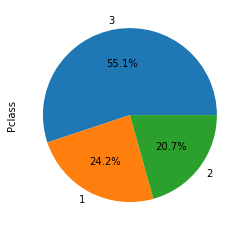

In [24]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [0]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [30]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Ticket',
       'Embarked'],
      dtype='object')

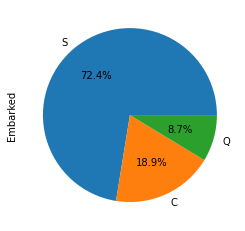

In [75]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%1.1f%%')

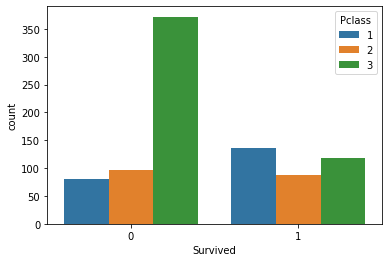

In [76]:
sns.countplot(x='Survived',hue='Pclass',data=df)

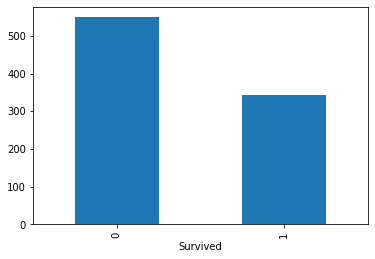

In [80]:
df.groupby(['Survived'])['Pclass'].count().plot(kind='bar')

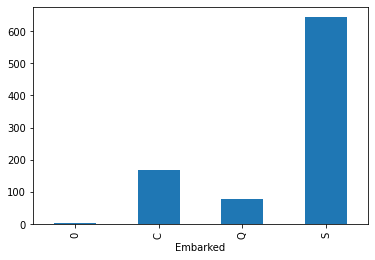

In [45]:
df.groupby(['Embarked'])['Pclass'].count().plot(kind='bar')

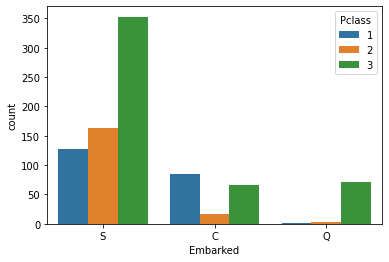

In [81]:
sns.countplot(x='Embarked',hue='Pclass',data=df)

In [0]:
# Split data into train test set in train:test=70:30 size
train, test = train_test_split(df, test_size=0.3, random_state = 42)

In [47]:
train.shape

(623, 7)

In [48]:
test.shape

(268, 7)